# Instruction:


**Note**: During the program, you don't need to pay much attendtion to the  lines starts with white or yellow, which mostly code, but read green lines and outputs(new window under code blocks)!      
## 1. Upload your data to Google Drive
  &nbsp;&nbsp;&nbsp;&nbsp; Create a folder with a proper name in Google Dirve, and upload all your data to this folder.
## 2. Run through `Loading packages` Block
  &nbsp;&nbsp;&nbsp;&nbsp; There is nothing to change in this section, just run through all cells and it might takes few seconds.
## 3. Change path to the folder contain your data in `Settings` block
  &nbsp;&nbsp;&nbsp;&nbsp; This section include path the the folder and some other parameters.      
  &nbsp;&nbsp;&nbsp;&nbsp; NOTE: the format of images should be **"index_something_else.czi"**, and the **index** must be a integer that can be sorted. NO letters, symbos, and **"_"** must be used for sepreating **index** and **others parts**. ***Or the code in Step 5 will crash!!!***     
## 4. Change Parameters
  &nbsp;&nbsp;&nbsp;&nbsp; In `Settings` section, you can change the default settings to your own settings. You will see some explanation of how each parameters affect the result(s). However, sometimes it's might work properly as expected. Make sure you have your parameters settings record as reference in case you need to come back.
## 5. Automated ROI finder
  &nbsp;&nbsp;&nbsp;&nbsp; With all path, parameter settled run `For single image` or `For a batch of images` block as needed. Right now, the program only accept `.czi` files. At each time running, the program will automaticlly download the model.             
  ### &nbsp;&nbsp;&nbsp;&nbsp; `For single image` block:      
   > This block will take one image as input, and generate an `.csv` file and a `.png` file. All ROI results are saved in the `.csv` file and the `.png` file represent ROI for later reference.
  ### &nbsp;&nbsp;&nbsp;&nbsp; `For a batch of images` block:      
   > This block will take a folder as input. It's ok if the folder contain other files. The program will only take `.czi` files from the folder. By runing this block, a new folder will be generated, named by date and time. All results can be found in that folder. For each input image, there will be an `.csv` file and a `.png` file generated. Then, all ROI **medians** will be save in `master.csv` file for better later analysis.    
## 6. Download your results from Google Drive
  &nbsp;&nbsp;&nbsp;&nbsp; Make sure you download your results from Google Drive. All data folder will be deleted automaticly in every weekend due to the limited storage space in Google Drive.    
## 7. For tuning purposes(if results not good)
  &nbsp;&nbsp;&nbsp;&nbsp; if you are not satisfy your results with current settings, you can simple select one image and run single image with different parameters for optimize your results. In such case, you could make a new folder for better file organization

# Note:      
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Make sure your data is also saved in **your** computer. The Google Drive is ***NOT*** for data storage purpose, and the storage space is limited.             
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In addition, Colab will automatically disconnect if there is no actions for certain period of time. So that it's not possible to run this overnight. It will be shut down at some point. However, for small amount of data, it's seems OK. But keep eye on it to make sure it's still running. An estimate running time for a single image is about ***10 seconds***.

# Load Packages

In [ ]:
# mount Google Drive here  --> DO NOT RUN this cell, since Google Drive is already mounted!

# it only works on emugen.cells@gmail.com Google Drive
from google.colab import drive
drive.mount('/content/drive')
# it should be mounted already, no mount needed at each time

Mounted at /content/drive


In [ ]:
# don't change anything here, or the program will crash

# check environments; this step might takes 1-2 minutes
# Colab will automaticlly delete all settings in every certain amount of time
# The cell will change running enviornment and fix all missing parts
# ignore output for this part
!pip install aicsimageio
!pip install cellpose==3.1.1.2
!pip install aicspylibczi>=3.1.1
!pip install scikit-posthocs
!pip install bioformats_jar

import sys
sys.path.append('/content/drive/MyDrive/cell_intensity')


from batch_image import *
from single_image import *
from find_vertices import *
from image_class import *

INFO: pip is looking at multiple versions of ome-zarr to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Settings

In [ ]:
# define path here

# change path to your folder path
# you can quickly get the path from left toolbar under `Files` tab
# just find your folder and right click on the folder
# you will be able to see `Copy path` in pop-up meau
# Then, paste the path between '', using ctrl+v

# Normally, if data is saved in Google Drive, it should loacted under
#  '/content/drive/MyDrive/YOUR_DATA'
# refresh the list and wait for few seconds if the path not shown

# these 2 lines was used to test the code
#full_path = '/content/drive/MyDrive/test/Thal 4_2023_07_18__17_57_42.czi'
# full_path = '/content/drive/MyDrive/test'

# paste your path here, between ''
full_path = '/content/drive/MyDrive/VCAP102-UBC-GFP-THAL'

# for eample for a folder '/content/drive/MyDrive/sample_data'
# for a image '/content/drive/MyDrive/sample_data/Thal 10_2023_07_18__18_12_12.czi'

# also put your group information here:

group_info = {
    'WT':[1,2,3,4],
}

# the format here is 'group_name':[numbers, divided, by, comma],

#group_info = {'Test':[1],
#} # the format here is 'group_name':[numbers, divided, by, comma],

# outputs in master.csv will be sorted in this order
# the column will be named as groupName_index

In [ ]:
# set parameters here
# in case of changing parameter, try to make a big change first and roll back
param = {
# an estimated diameter for predicting cells,
# normally around 60 is good number
#
'diameter': 60,

# maximum error for keeping (0.4)
# keep this small to reduce false postive
'flow_threshold': 0.4,

# mininum intensity for all pixels for keeping (0)
# keep this around 3 to eliminate(reduce) boundaries
# and eliminate some dimmer cells
'cellprob_threshold': 2,

# mimnum size for single cell for keeping (15)
# no big changes here, could do an estimate on cell pixel size for that
'min_size': 1000
# the idea of this parameter is give a soft rule of selecting ROIs
# this number works like a average, similar like diameter
# it DO NOT means all cells with size 2000 and less will be ignored!
}

cell_size_threshold = 200
# This is the threshold of selecting cells, a hard rule.
# all cells less than that size in pixel will be ingnored!
# so it might be play around in single image to find a ideal size!

# note: the number in () in green lines is the default in cellpose
# current number (75, 0.15, 5, 2000) is good for Thalamus for now

## NEW version with Object Oriented

In [ ]:
# this line will create an object that hold the cellpose model and all parameters
CEnt = project(full_path, param, cell_size_threshold, group_info)  # feel free to change name of the object

# this function will take user specific channels for masking and signals
median_master_df, mean_master_df= CEnt.batch_masking(cellpose_ch=0,  # channel for cellpose masking
                               signal_ch=2,  # channel for getting signal intensity from mask
                               gamma=1, # Shan often uses 0.15 gamma; coefficient for increasing contrast rate, set to False to turn it off
                               save=True)

# output of this function will be used for generating master.csv files
print("Shape of median_master_df:", median_master_df.shape) # Added print statement
CEnt.orgnize_master_files(median_master_df, 'median') # export data to master.csv files for medians
print("Shape of mean_master_df:", mean_master_df.shape) # Added print statement
CEnt.orgnize_master_files(mean_master_df, 'mean') # export data to master.csv files for means


print('\nDone!')
print('Download your results from Google Drive')
print('\nIt might takes up to few mintues until \
your results shows up in Google Drive')

['1_Thal_2025_11_17__10_48_50.czi', '2_Thal_2025_11_17__10_50_32.czi', '3_Thal_2025_11_17__10_52_22.czi', '4_Thal_2025_11_17__10_54_29.czi']
Exporting results to:  intensity_result_mask0_signal2_2025-11-18_02-12-36


Cellpose analyzing progress: 100%|██████████| 4/4 [00:53<00:00, 13.49s/it]

Shape of median_master_df: (60, 4)
Shape of mean_master_df: (60, 4)

Done!
Download your results from Google Drive

It might takes up to few mintues until your results shows up in Google Drive


### Count cells in all channels

In [ ]:
#CEnt = project(full_path, param, cell_size_threshold, group_info)
###### NOTE######
# fist line is the same initilization as previous section,
# if you already run the last section, ignore this part, just run this section
# if you ONLY want to count cells without last section, delete the '#' at the very begining
# make sure you always put '#' back after running if you delete it. Or counts will be saved into differnt folder(which shouldn't cause too much trouble)


raw_counts, sorted_counts = CEnt.count_cells_per_channel([0, 1, 2]) # you can specify channels you want to count here,
                                                                    # first channel is channel 0 not channel 1,
                                                                    # it will use same parameters for all channels(that might be a problem in the future)


['1_Thal_2025_11_17__10_48_50.czi', '2_Thal_2025_11_17__10_50_32.czi', '3_Thal_2025_11_17__10_52_22.czi', '4_Thal_2025_11_17__10_54_29.czi']


100%|██████████| 25.3M/25.3M [00:02<00:00, 12.8MB/s]
100%|██████████| 5.23k/5.23k [00:00<00:00, 3.05MB/s]
Counting cells per channel: 100%|██████████| 4/4 [00:52<00:00, 13.23s/it]


Cell count results saved to: /content/drive/MyDrive/VCAP102-UBC-GFP-THAL/analysis_results_2025-11-20_16-49-40/cell_counts_per_channel_2025-11-20_16-50-33


#### debug session

### Plotting functions (NOT in Use)

#### make plot based on master.csv

In [ ]:
# change the following line to the path of the newly generated folder
path = '/content/drive/MyDrive/SCN2A IVS All Pools/analysis_results_2025-10-18_13-37-20/intensity_result_mask2_signal0_2025-10-18_13-37-20'
# change color if necessay, most of color would be recognized
color_lst = ['grey',
             'purple',
             'pink',
             'blue',
             'yellow',
             'orange',
             'green',
             'red',
             'magenta',
             'cyan',
             'teal',
             'brown',
             'navy',
             'maroon',
             'olive',
             'aqua',
             'beige',
             'bisque',
             'blanchedalmond',
             'cadetblue',
             ]



if len(color_lst) != len(group_info):
  print('Wrong color_lst length')
else:
  print('Good to go!')

Good to go!


#### make plot for each image

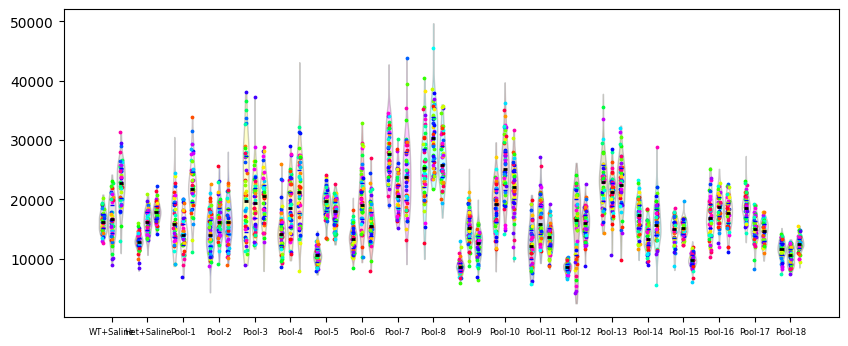

In [ ]:
# new feature here: change scatter to False/True show scatters
# or change it to number to plot every n points(make plot faster and less points)
# you can also specify which measurement you want to plot ('mean or median')
f1 = make_individual_plot(path, group_info, color_lst,
                          measurments='median', # 'mean' or 'median'
                          scatter=50,        # number of scatter will be added (larger number will cause longer execution)
                          scatter_size=3,     # size of scatter points (<5 should be good)
                          width=0.9,          # width of ALL violinplot(0.5-1 is recommanded)
                          font=6,             # font size of xticks (8-10 is recommanded)
                          figsize=[10,4])     # [width, height] of the plot

# uncommon this line if you want to save the plot:
# f1.savefig(os.path.join(path, 'individual_plot.pdf')) # feel free to change .pdf to other desire formats

#### make plot for each group

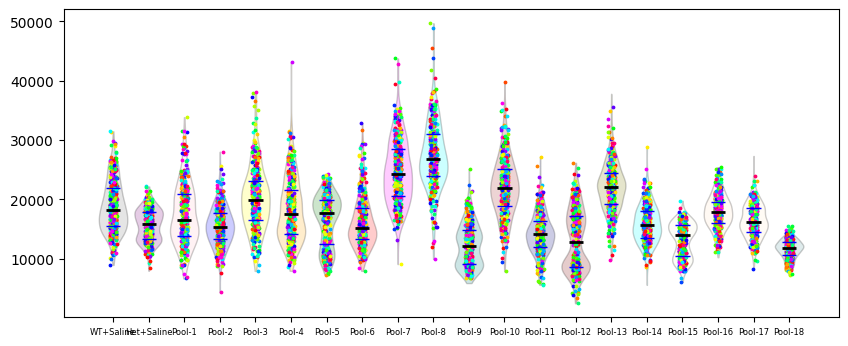

In [ ]:
f2 = make_group_plot(path, group_info, color_lst,
                     measurments='median', # 'mean' or 'median'
                     scatter=500,        # number of scatter will be added (larger number will cause longer execution)
                     scatter_size=3,     # size of scatter points
                     width=0.8,          # width of ALL violinplot
                     font=6,             # font size of xticks
                     figsize=[10,4])     # [width, height] of the plot)

# uncommon this line if you want to save the plot:
# f2.savefig(os.path.join(path, 'group_plot.png')) # feel free to change .png to other desire formats

In [ ]:
# HERE YOU CAN GET % cells are below the threshold
# a result will be printed underneath

# set intensity threshold here for minimum intensity medians

# update here:
# add thershold for both median and mean

intensity_threshold_low_bound = 158 #median of Mecp2+/-
intensity_threshold_high_bound = 164 #maximum value of WT

# a .csv file will be generated
# it includes overall dim cells percentage in each group and in each image

get_dim_ratio(path, 'median', #'mean' or 'median'
              intensity_threshold_low_bound, intensity_threshold_high_bound)

3.6145 WT_1
11.3924 WT_2
8.4337 WT_3
3.1579 WT_4
0.0 Hemi+Div01 2e12_5
3.1579 Hemi+Div01 1e13_6
8.0808 Hemi+Div01 1e13_7
7.9208 Hemi+Div01 1e13_8
13.2353 Hemi+Div01 1e13_9
1.2658 Hemi+Div01 5e13_10
4.4118 Hemi+Div01 5e13_11
0.9615 Hemi+Div01 5e13_12
1.4085 Hemi+Div01 5e13_13
0.0 Hemi+Div03 2e12_14
0.0 Hemi+Div03 2e12_15
7.9137 Hemi+Div03 1e13_16
4.5161 Hemi+Div03 1e13_17
0.0 Hemi+Div03 1e13_18
0.9259 Hemi+Div03 1e13_19
12.5 Hemi_Div03 5e13_20
4.4444 Hemi_Div03 5e13_21
9.9237 Hemi_Div03 5e13_22
6.0606 Hemi_Div03 5e13_23


## Cross channel analysis(include saving maskings) (NOT in Use)
**Use this section if you want to work with more than multiple channel comparisons**

## How this works
Idea for this function is to compare cells in different channels, for example, you want to see how many GFP cells are NueN cells based on NeuN masking. This part will do the mask on a channel that you want to check total number of cells, then, apply this mask to the channels you want to do the comparison.

This function will do the "normal" cell masking processes as above to track cells based on 2 channels, outputing results folders.Then, do the comparison based on the outputs. It will return the ratios such as how many cells are valid cells in given range and how many cells are both in selected channels.

### Instruction
#### 1. Parameters  
- **cellpose_ch**: the channel you want to get mask from   
- **mask_ch1, mask_ch2**: the mask will be applied to these 2 channels    
- **low_bound_ch{n}, up_bound_ch{n}**: valid boundary for ch{n} masking, filter out all cells that out of this range in both `mean` and `median` results
  - you might want to do a test run for these parameters, since different images have different conditions, such as background intensity
- **group_info**: self defined `group_info` from above    
- **measurments**: either `mean` or `median`, for comparison   

#### 2. Outputs
- **ch1%**: % cells in first channel in boundary [low_bound_ch1, up_bound_ch1]
- **ch2%**: % cells in second channel in boundary [low_bound_ch2, up_bound_ch2]
- **ch1 in ch2%**: % valid cells in ch2 that also in valid ch1
  



In [ ]:
CEnt = project(full_path, param, cell_size_threshold, group_info)  # feel free to change name of the object
CEnt.both_channel_ratio(cellpose_ch=2,  # channel used for cellpose masking
                        mask_ch1=0,    # first channel for masking signals
                        mask_ch2=2,   # second channel for masking singals
                        low_bound_ch1=100,  # boundies for ch1
                        up_bound_ch1=600,
                        low_bound_ch2=100,  # boundies for ch2
                        up_bound_ch2=600,
                        group_info=group_info, # group information
                        measurments='mean',# comparison in median or mean
                        )

['1_3R-Thal_025_01_15__10_36_21.czi', '2_3L-Thal_2025_01_15__10_37_51.czi', '3_3LR-Thal_2025_01_15__11_04_28.czi', '4_3-2R-Thal_2025_01_15__11_06_20.czi', '5_4R-Thal_2025_01_15__13_05_05.czi', '6_4L-Thal_2025_01_15__13_05_57.czi', '7_4LR-Thal_2025_01_15__11_37_10.czi', '8_4-2R-Thal_2025_01_15__11_38_51.czi']
Exporting results to:  intensity_result_mask2_signal0_2025-01-15_21-42-16


Cellpose analyzing progress: 100%|██████████| 8/8 [01:47<00:00, 13.41s/it]


Exporting results to:  intensity_result_mask2_signal2_2025-01-15_21-44-03


Cellpose analyzing progress: 100%|██████████| 8/8 [01:42<00:00, 12.82s/it]


there is no cells in this image: 1_3R-Thal_025_01_15__10_36_21
there is no cells in this image: 2_3L-Thal_2025_01_15__10_37_51
there is no cells in this image: 3_3LR-Thal_2025_01_15__11_04_28
there is no cells in this image: 4_3-2R-Thal_2025_01_15__11_06_20
there is no cells in this image: 5_4R-Thal_2025_01_15__13_05_05
there is no cells in this image: 6_4L-Thal_2025_01_15__13_05_57
there is no cells in this image: 7_4LR-Thal_2025_01_15__11_37_10
there is no cells in this image: 8_4-2R-Thal_2025_01_15__11_38_51


IndexError: positional indexers are out-of-bounds

In [ ]:
# After running the cell above (tZr4HcBhuPSw), let's inspect the output directory and expected file paths.

# The CEnt object holds information about the output directory.
# Let's access and print the output directory path.
output_directory = CEnt.output_path # Assuming the output directory is stored in an attribute named 'output_path'

print(f"Expected output directory: {output_directory}")

# Based on the code in cell 6kRHFAeNha0K and the traceback, the expected files are:
expected_median_file = os.path.join(output_directory, 'median_sorted_master.csv')
expected_mean_file = os.path.join(output_directory, 'mean_sorted_master.csv')

print(f"Expected median sorted master file: {expected_median_file}")
print(f"Expected mean sorted master file: {expected_mean_file}")

# Now, let's compare the 'path' variable used in the plotting cells with the actual output directory.
print(f"Path variable used in plotting cells: {path}")

# You can also check if these files exist in the expected location after the previous cell runs successfully
import os

if os.path.exists(expected_median_file):
    print(f"'{expected_median_file}' exists.")
else:
    print(f"'{expected_median_file}' does NOT exist.")

if os.path.exists(expected_mean_file):
    print(f"'{expected_mean_file}' exists.")
else:
    print(f"'{expected_mean_file}' does NOT exist.")

AttributeError: 'project' object has no attribute 'output_path'